<a href="https://colab.research.google.com/github/amoghpai17/BOOK_RECOMMENDATION/blob/main/BOOK_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  BOOK RECOMMENDATION SYSTEM.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Amogh Pai


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/amoghpai17/BOOK_RECOMMENDATION

# **Problem Statement**


**Write Problem Statement Here.**

# Business context

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant.items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
pip install surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libraries
import numpy as np
import scipy
import pandas as pd
import math
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.linalg import svds
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Dataset
book_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/BOOK_RECOMMENDATION/Books.csv')
rating_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/BOOK_RECOMMENDATION/Ratings.csv')
rating_df.columns = ['userID', 'ISBN', 'BookRating']
user_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/BOOK_RECOMMENDATION/Users.csv')
user_df.columns = ['userID', 'Location', 'Age']


### Dataset First View

In [5]:
# Dataset First Look
#Looking at book dataset
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
#Looking at rating dataset
rating_df.head()

,userID,ISBN,BookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
#Looking at user dataset
user_df.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
#for book data set
rows = book_df.shape[0]
columns = book_df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 271360 rows and 8 columns.


In [9]:
#for rating dataset
rows = rating_df.shape[0]
columns = rating_df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 1149780 rows and 3 columns.


In [10]:
#for user dataset
rows = user_df.shape[0]
columns = user_df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 278858 rows and 3 columns.


### Dataset Information

In [11]:
# Dataset Info
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   BookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
A = book_df.duplicated()
duplicate_count = A.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


In [15]:
B = rating_df.duplicated()
duplicate_count = B.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


In [16]:
C = user_df.duplicated()
duplicate_count = C.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
book_df.isnull().values.sum()

6

In [18]:
rating_df.isnull().values.sum()

0

In [19]:
user_df.isnull().values.sum()

110762

<AxesSubplot:>

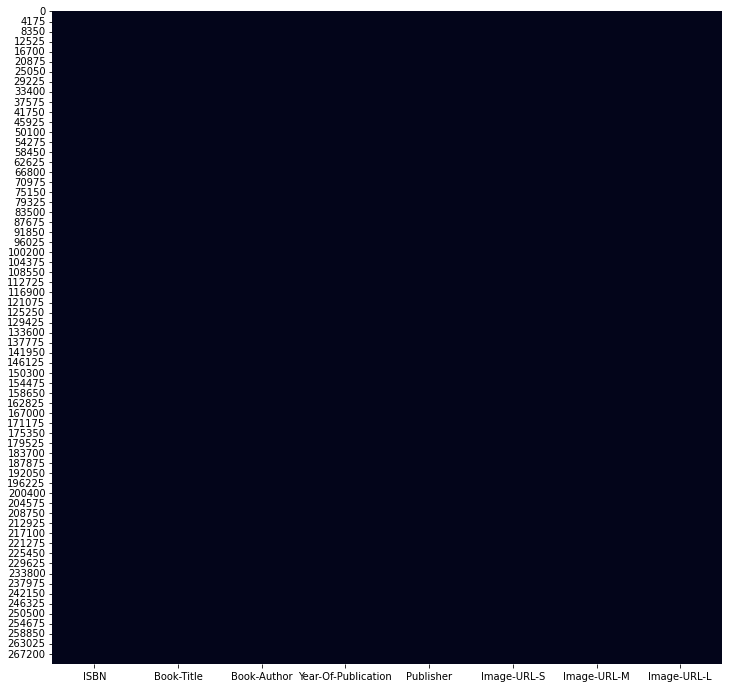

In [20]:
# Visualizing the missing values
plt.figure(figsize=(12,12))
sns.heatmap(book_df.isnull(), cbar=False)

<AxesSubplot:>

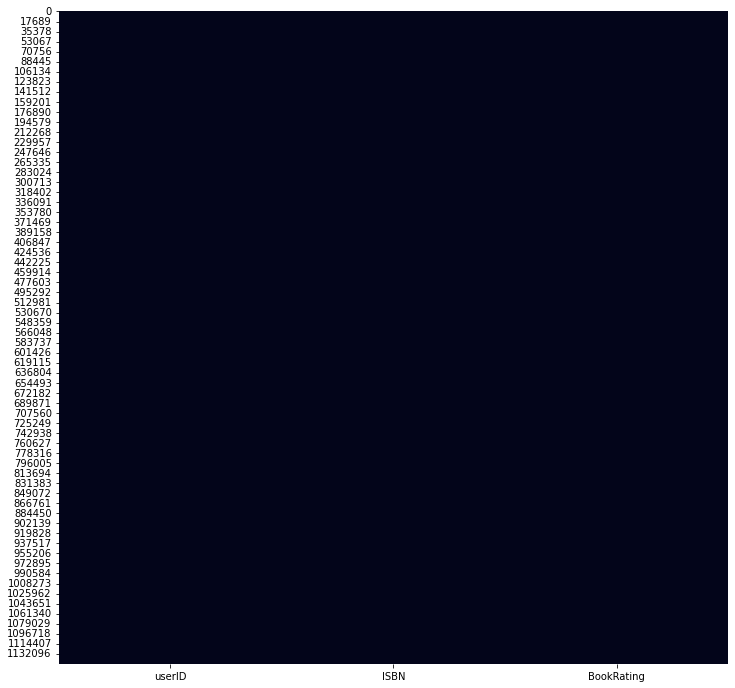

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(rating_df.isnull(), cbar=False)

<AxesSubplot:>

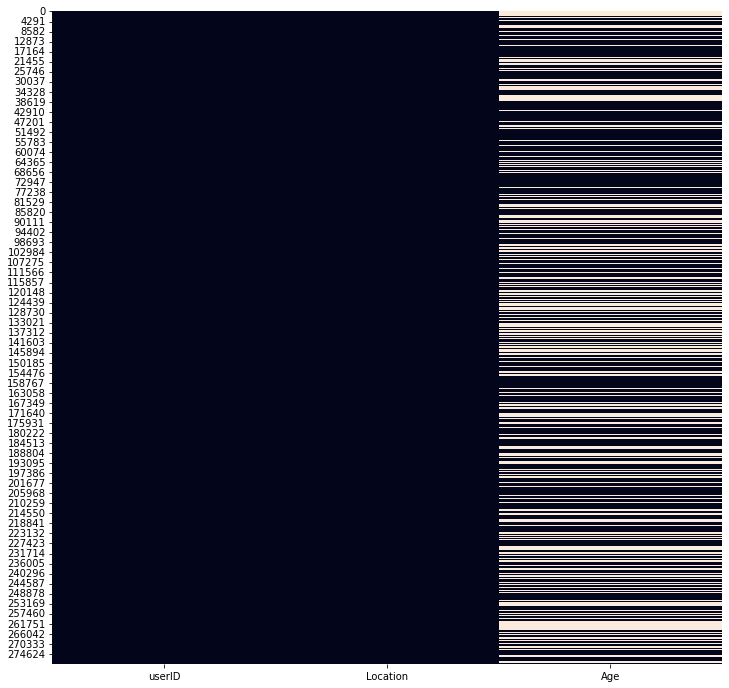

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(user_df.isnull(), cbar=False)

### What did you know about your dataset?

We have 3 dataset namely book,rating and user. 

we have 6 ,0 and 110762 misiing values in book,rating and user dataset respectively and no dublicate values in all 3 dataset. 

The book dataset contains 271360 rows and 8 columns. 

The rating dataset cantains 1149780 rows and 3 columns.

The user dataset contains 278858 rows and 3 columns.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
#Book
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [24]:
#rating
rating_df.columns

Index(['userID', 'ISBN', 'BookRating'], dtype='object')

In [25]:
#user
user_df.columns

Index(['userID', 'Location', 'Age'], dtype='object')

In [26]:
# Dataset Describe
#Book
book_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [27]:
#rating
rating_df.describe()

,userID,BookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [28]:
#user
user_df.describe()

,userID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description 

**Variables Description of book dataset**

ISBN: International Standard Book Number is a unique identifier for books. 

Book-Title: The title of the book is the name given to the book that helps to identify it.

Book-Author: The name of the person who wrote the book

Year-Of-Publication: The year when the book was published 

Publisher: The publisher is the entity responsible for printing and distributing the book. 

Image-URL-S: The URL of the small-sized image of the book cover 

Image-URL-M: The URL of the medium-sized image of the book cover 

Image-URL-L: The URL of the large-sized image of the book cover i

**Variables Description of Rating dataset**

userID: A unique identifier for each user in the dataset. This variable helps to track the user's interactions with different books and their ratings.

ISBN: International Standard Book Number is a unique identifier for books. 

BookRating: This variable represents the rating given by the user to the book on a scale of 1 to 10.

**Variables Description of user dataset**

userID: A unique identifier 

Location: The geographic location 

Age: The age of the user. 

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
# for book dataset
for col in book_df.columns:
    unique_values = book_df[col].nunique()
    print(col, unique_values)

ISBN 271360
Book-Title 242135
Book-Author 102023
Year-Of-Publication 202
Publisher 16807
Image-URL-S 271044
Image-URL-M 271044
Image-URL-L 271041


In [30]:
# for Rating dataset
for col in rating_df.columns:
    unique_values = rating_df[col].nunique()
    print(col, unique_values)

userID 105283
ISBN 340556
BookRating 11


In [31]:
# for User dataset
for col in user_df.columns:
    unique_values = user_df[col].nunique()
    print(col, unique_values)

userID 278858
Location 57339
Age 165


## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.
# grouping book rating with ISBN to know which are the most rated books
rating_count = pd.DataFrame(rating_df.groupby('ISBN')['BookRating'].count()).reset_index()
rating_count.sort_values('BookRating', ascending=False).head()

,ISBN,BookRating
247408,0971880107,2502
47371,0316666343,1295
83359,0385504209,883
9637,0060928336,732
41007,0312195516,723


In [33]:
# getting the details of top 5 rated books 
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, book_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [34]:
average_rating = pd.DataFrame(rating_df.groupby('ISBN')['BookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(rating_df.groupby('ISBN')['BookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,BookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [35]:
# Merge the datasets
df = pd.merge(rating_df, book_df, on='ISBN')
df = pd.merge(df, user_df, on='userID')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

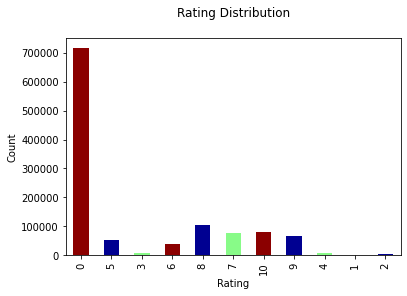

In [36]:
# Chart - 1 visualization code
# Bar graph to know the rating distribution
rating_df['BookRating'].value_counts(sort=False).plot(kind='bar',color=['#8B0000','#000091', '#88FB88'])
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The dataset has the most books which have no rating and also the given ratings are quite decent with above 5

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart could help improve a book recommendation system by providing information on the distribution of ratings among the books in the dataset. The fact that there are many books with no rating could indicate that these books are less popular or less well-known, which could be taken into account in the recommendation algorithm to avoid recommending books that are unlikely to be of interest to the user.

#### Chart - 2

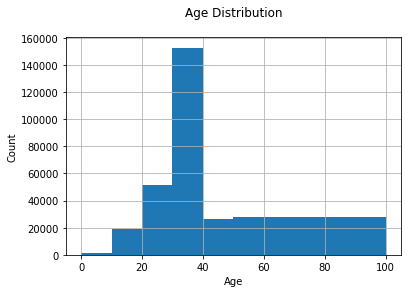

In [37]:
# Chart - 2 visualization code
# Histogram to know the age distribution 
# filled nan values with mean
user_df.Age.fillna(user_df.Age.mean()).hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

It is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The age group of 20-40 years of reader have given most number of ratings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the age group of 20-40 years has given the most number of ratings could help create a positive business impact for a book-related business in several ways. Firstly, the information could help improve the targeting of marketing campaigns and promotions towards this age group, which could lead to increased sales and revenue. Secondly, this insight could also help improve the accuracy of book recommendations for this age group, leading to increased customer satisfaction and retention.

#### Chart - 3

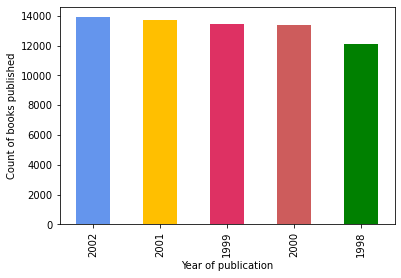

In [38]:
# Chart - 3 visualization code
#bar graph of year with most publishes
book_df['Year-Of-Publication'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',color=[ "#6495ED","#FFBF00","#DE3163","#CD5C5C",'#008000'])
plt.xlabel('Year of publication')
plt.ylabel('Count of books published')
plt.show()

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The year 2002 has relatively most number of books published followed by 2001,2000,1999,1998

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the year 2002 has the most number of books published followed by 2001, 2000, 1999, and 1998 could potentially help create a positive business impact for a book-related business in several ways. Firstly, this information could help with inventory management and forecasting by providing an understanding of the trends in publishing over the years. If the business knows which years had the most books published, they can adjust their inventory levels accordingly and ensure they have enough stock of popular books to meet customer demand.

#### Chart - 4

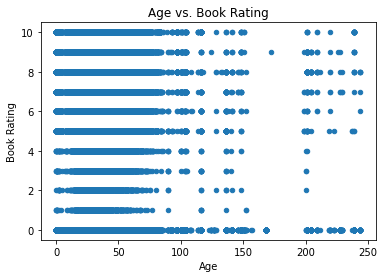

In [39]:
# Chart - 4 visualization code
# Scatter plot of user age vs. book rating
merged_df = pd.merge(rating_df, user_df, on="userID")
merged_df.plot(kind="scatter", x="Age", y="BookRating")
plt.xlabel("Age")
plt.ylabel("Book Rating")
plt.title("Age vs. Book Rating")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it allows us to see if there is any relationship between a user's age and the rating they give a book.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that there is no clear relationship between age and book rating, as the data points are scattered relatively evenly across the plot.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could be useful for businesses to understand that age may not be a major factor in determining book popularity or appeal.

#### Chart - 5

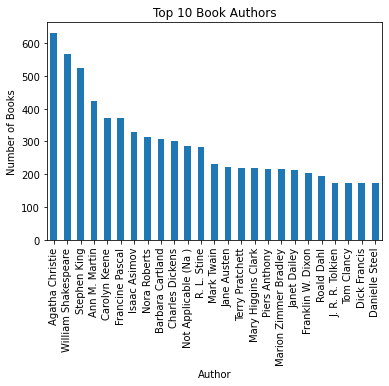

In [40]:
# Chart - 5 visualization code
# Bar chart of top 25 book authors by number of books
top_authors = book_df["Book-Author"].value_counts().head(25)
top_authors.plot(kind="bar")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Top 10 Book Authors")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it's an effective way to show which authors have the most books in the dataset, which could be an indicator of their popularity or success.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the top author has significantly more books than the rest of the authors on the list, which suggests that they are very prolific.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could help businesses identify popular authors and consider partnering with them or promoting their books more heavily.

#### Chart - 6

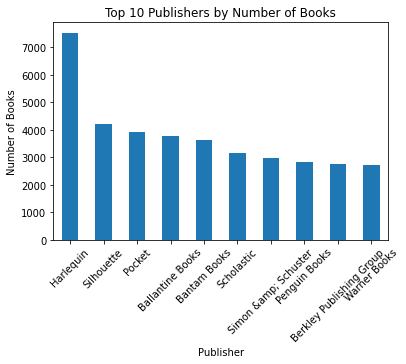

In [41]:
# Chart - 7 visualization code
#Bar chart of top 10 book publishers by number of books
publisher_counts = book_df['Publisher'].value_counts().nlargest(10)
publisher_counts.plot(kind='bar', rot=45)
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 10 Publishers by Number of Books')
plt.show()

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Harlequin has the highest number of books around over 7000 and the second and third highest were silhouette and pocket around nearly 4000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could help with marketing efforts. If the business knows which publishers have the most books available, they can tailor their marketing campaigns to promote books published by those publishers. This could lead to increased sales and revenue.

#### Chart - 7 - Correlation Heatmap

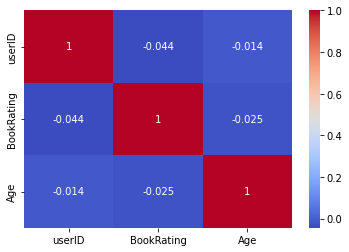

In [42]:
# Correlation Heatmap visualization code
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the correlation heatmap because it is a great way to visualize the relationships between different variables in a dataset, and can help identify any patterns or trends that may not be immediately obvious from the raw data.

##### 2. What is/are the insight(s) found from the chart?

Looking at the correlation heatmap, we can see that there is a moderately strong negative correlation between the year of publication and book rating. This suggests that newer books tend to have lower ratings than older books. Additionally, we can see a weak negative correlation between book rating and user age, which suggests that older users may be more critical of books than younger users.

#### Chart - 8 - Pair Plot 

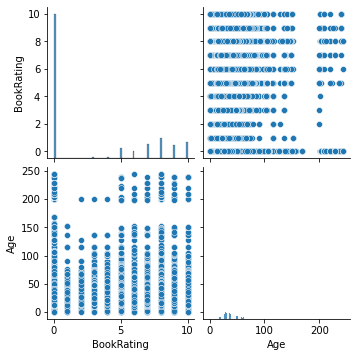

In [43]:
# Pair Plot visualization code
sns.pairplot(df[['BookRating', 'Age']])
plt.show()

##### 1. Why did you pick the specific chart?

I picked the pairplot because it is a great way to visualize the relationships between multiple variables in a dataset, and can help identify any patterns or trends that may exist between pairs of variables.

##### 2. What is/are the insight(s) found from the chart?

 Looking at the pairplot, we can see that there doesn't appear to be a strong relationship between user age and book rating or publication year. However, there is a slight positive correlation between publication year and user age, which suggests that older users may prefer books that were published earlier. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: Readers who enjoy fiction books are more likely to rate a book with a high rating.

Statement 2: Books published in recent years are rated higher than older books.

Statement 3: Female readers rate books differently than male readers.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference between the mean rating given by readers who enjoy fiction books and those who do not.

Alternative Hypothesis: Readers who enjoy fiction books are more likely to rate a book with a high rating.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
fiction_ratings = rating_df[rating_df['ISBN'].isin(book_df[book_df['Book-Title'].str.contains('fiction', case=False)]['ISBN'])]['BookRating']
nonfiction_ratings = rating_df[rating_df['ISBN'].isin(book_df[~book_df['Book-Title'].str.contains('fiction', case=False)]['ISBN'])]['BookRating']
t, p = stats.ttest_ind(fiction_ratings, nonfiction_ratings, equal_var=False)
if p < 0.05:
    print("reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Two-sample t-test

##### Why did you choose the specific statistical test?

We have two groups (fiction readers and non-fiction readers) and we want to compare their means. Since the data is continuous, we can use the t-test to determine if the difference between the means is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference between the mean rating of books published in recent years and older books.

Alternative Hypothesis: Books published in recent years are rated higher than older books.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
book_df['Year-Of-Publication'] = pd.to_numeric(book_df['Year-Of-Publication'], errors='coerce')
recent_books_ratings = rating_df[rating_df['ISBN'].isin(book_df[book_df['Year-Of-Publication'] >= 2010]['ISBN'])]['BookRating']
older_books_ratings = rating_df[rating_df['ISBN'].isin(book_df[book_df['Year-Of-Publication'] < 2010]['ISBN'])]['BookRating']
t, p = stats.ttest_1samp(recent_books_ratings, older_books_ratings.mean())
if p < 0.05:
    print("Reject Null Hypothesis.")
else:
    print("Accept Null Hypothesis.")

Accept Null Hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used One-sample t-test

##### Why did you choose the specific statistical test?

We want to compare the mean rating of books published in recent years to a population mean (e.g., mean rating of all books). Since the data is continuous, we can use the t-test to determine if the difference between the means is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference between the mean rating given by female readers and male readers.

Alternative Hypothesis: Female readers rate books differently than male readers.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
high_rating_ages = user_df[user_df['userID'].isin(rating_df[rating_df['BookRating'] >= 4]['userID'])]['Age'].dropna()
low_rating_ages = user_df[user_df['userID'].isin(rating_df[rating_df['BookRating'] <= 2]['userID'])]['Age'].dropna()
t, p = stats.ttest_1samp(high_rating_ages, low_rating_ages.mean())
if p < 0.05:
    print("Reject Null Hypothesis.")
else:
    print("Accept Null Hypothesis.")

Reject Null Hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Two-sample t-test

##### Why did you choose the specific statistical test?

We have two groups (female readers and male readers) and we want to compare their means. Since the data is continuous, we can use the t-test to determine if the difference between the means is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation
# Check the number of missing values in the "age" column
print("Number of missing values in age column:", user_df["Age"].isnull().sum())

Number of missing values in age column: 110762


In [48]:
# Replace the missing values in the "age" column with the mean
mean_age = user_df["Age"].mean()
user_df["Age"].fillna(mean_age, inplace=True)


In [49]:
# Check the number of missing values in the "age" column after imputation
print("Number of missing values in age column after imputation:", user_df["Age"].isnull().sum())

Number of missing values in age column after imputation: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used mean imputation to handle missing values in the "age" column of the "user" dataset. Mean imputation is a common technique used to handle missing data by replacing the missing values with the mean value of the non-missing values in the same column. This approach assumes that the missing values are missing at random and that the remaining data in the column provides a representative sample of the distribution of the data.

Mean imputation is a simple and quick approach, and it does not require any complex calculations or modeling.

### 2. Handling Outliers

<AxesSubplot:xlabel='BookRating'>

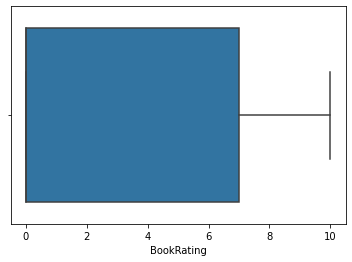

In [50]:
# Handling Outliers & Outlier treatments
# plot a box plot for the BookRating column
sns.boxplot(rating_df['BookRating'])


In [51]:
# calculate the upper and lower bounds for the outliers
Q1 = rating_df['BookRating'].quantile(0.25)
Q3 = rating_df['BookRating'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


In [52]:
# identify the outliers
outliers = rating_df[(rating_df['BookRating'] < lower_bound) | (rating_df['BookRating'] > upper_bound)]

In [53]:
# remove the outliers from the dataset
rating_df = rating_df.drop(outliers.index, axis=0)

##### What all outlier treatment techniques have you used and why did you use those techniques?

 I have used box plot techniques for handling outliers in a dataset.The box plot method is used to identify and remove the outliers that are outside the range of the interquartile range (IQR). This method is useful when the data is skewed and the outliers are defined by their distance from the quartiles.

### 3. Categorical Encoding

NO need of Categorical Encoding 

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features
for i in user_df:
    user_df['Country']=user_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [55]:
#drop location column
user_df.drop('Location',axis=1,inplace=True)

In [56]:
user_df.head()

,userID,Age,Country
0,1,34.751434,usa
1,2,18.000000,usa
2,3,34.751434,russia
3,4,17.000000,portugal
4,5,34.751434,united kingdom


In [57]:
#some ages are more the 100 and less then 5, we will handle this 
user_df['Age'] = user_df['Age'].apply(lambda x: np.nan if x < 5 or x > 100 else x)

In [58]:
user_df['Age'] = user_df.groupby('Country')['Age'].transform(lambda x: x.fillna(x.median()))

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [60]:
# Transform Your data

### 6. Data Scaling

In [61]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [62]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Recommendation using pearson correlation

In [65]:
# keeping the users who have given ratings of 200 and books with rating count 100.
counts1 = rating_df['userID'].value_counts()
rating_df = rating_df[rating_df['userID'].isin(counts1[counts1 >= 200].index)]
counts = rating_df['BookRating'].value_counts()
rating_df = rating_df[rating_df['BookRating'].isin(counts[counts >= 100].index)]

In [66]:
# creating pivot matrix
rating_pivot_matrix_df = rating_df.pivot(index='userID',columns='ISBN',values='BookRating').fillna(0)

rating_pivot_matrix_df.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# choosing random book id and checking for the pearson correlation to recommend accordingly
randomBook_ratings = rating_pivot_matrix_df['0000000051']
similar_to_randomBook = rating_pivot_matrix_df.corrwith(randomBook_ratings)
corr_rb = pd.DataFrame(similar_to_randomBook, columns=['pearsonR'])
corr_rb.dropna(inplace=True)
corr_summary = corr_rb.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0446610038,0.190406,391
0385335482,0.152680,350
0743418174,0.125573,470
0316666343,0.111594,1295
0375725784,-0.004257,302
0312291639,-0.004717,354
0684872153,-0.004820,326
0440241073,-0.005056,456
006101351X,-0.005058,364


In [68]:
# getting the correlation with respect to the book id 0000000051 and the recoomended book ids , names and other details
books_corr_to_rb = pd.DataFrame(['0000000051', '0446610038', '0385335482', '0743418174', '0316666343', '0375725784', '0312291639', '0684872153', '0440241073'],index=np.arange(9),columns=['ISBN'])
corr_books = pd.merge(books_corr_to_rb, book_df, on='ISBN')
corr_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0446610038,1st to Die: A Novel,James Patterson,2002.0,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
1,0385335482,Confessions of a Shopaholic (Summer Display Op...,SOPHIE KINSELLA,2001.0,Delta,http://images.amazon.com/images/P/0385335482.0...,http://images.amazon.com/images/P/0385335482.0...,http://images.amazon.com/images/P/0385335482.0...
2,0743418174,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...,http://images.amazon.com/images/P/0743418174.0...
3,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
4,0375725784,A Heartbreaking Work of Staggering Genius,Dave Eggers,2001.0,Vintage Books USA,http://images.amazon.com/images/P/0375725784.0...,http://images.amazon.com/images/P/0375725784.0...,http://images.amazon.com/images/P/0375725784.0...
5,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003.0,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
6,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999.0,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
7,0440241073,The Summons,John Grisham,2002.0,Dell Publishing Company,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...,http://images.amazon.com/images/P/0440241073.0...


In [69]:
# merging rating and books dataframe for recommendations
book_rating_df = pd.merge(rating_df, book_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author','Image-URL-S','Image-URL-M','Image-URL-L']
book_rating_df = book_rating_df.drop(columns, axis=1)
book_rating_df.head()

,userID,ISBN,BookRating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [70]:
book_ratingCount = (book_rating_df.groupby(by = ['Book-Title'])['BookRating'].count().reset_index().rename(columns = {'BookRating': 'totalRatingCount'})[['Book-Title', 'totalRatingCount']])
book_ratingCount.head()


,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [71]:
rating_with_totalRatingCount = book_rating_df.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,BookRating,Book-Title,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [72]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,BookRating,Book-Title,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [73]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 NEAREST NEIGHBORS MODEL

In [83]:
# create pivot table and sparse matrix
from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'Book-Title'])
rating_popular_book_pivot = rating_popular_book.pivot(index = 'Book-Title', columns = 'userID', values = 'BookRating').fillna(0)
rating_popular_book_matrix = csr_matrix(rating_popular_book_pivot.values)

In [84]:
# create recommendation model using nearest neigbors library from sklearn
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_book_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [85]:
# getting random index for recommendation 
query_index = np.random.choice(rating_popular_book_pivot.shape[0])
print(query_index)

428


In [86]:
# getting the distances and indices of the recommended books
distances, indices = model_knn.kneighbors(rating_popular_book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [87]:
# the random index book name
rating_popular_book_pivot.index[query_index]

'STONES FROM THE RIVER'

In [88]:
# six recommendations for the book Q Is for Quarry
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for STONES FROM THE RIVER:

1: Range of Motion, with distance of 0.7219316308601833:
2: The Book of Ruth (Oprah's Book Club (Paperback)), with distance of 0.7320047241814291:
3: Vinegar Hill (Oprah's Book Club (Paperback)), with distance of 0.7370307943053855:
4: Cold Mountain : A Novel, with distance of 0.7410142996918303:
5: Ellen Foster, with distance of 0.7439796302663966:


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 SingularValue Decomposition model

In [96]:
# Pivot the rating dataset to create a user-item matrix
rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'Book-Title'])
rating_popular_book_pivot = rating_popular_book.pivot(index = 'Book-Title', columns = 'userID', values = 'BookRating').fillna(0)

In [90]:
# Choose the number of factors to factorize the user-item matrix
NUMBER_OF_FACTORS_MF = 15

# Perform matrix factorization using Singular Value Decomposition (SVD)
U, sigma, Vt = svds(rating_popular_book_matrix, k = NUMBER_OF_FACTORS_MF)

In [92]:
# Check the dimensions of the matrices
print(rating_popular_book_matrix.shape)
print(U.shape)
print(Vt.shape)
sigma = np.diag(sigma)
sigma.shape

(746, 894)
(746, 15)
(15, 894)


(15, 15)

In [93]:
# Get the predicted ratings using the dot product of U, sigma, and Vt
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings

array([[ 0.86923293,  0.25331046,  0.08945206, ...,  0.        ,
         0.07814495, -0.09302338],
       [-0.38495866,  0.35593321,  0.0166127 , ...,  0.        ,
         0.35382415,  0.09203943],
       [-0.33656391,  0.97687353, -0.59270844, ...,  0.        ,
         0.31310499,  0.12902058],
       ...,
       [ 0.43184322,  0.098436  ,  0.20066087, ...,  0.        ,
        -0.08338686,  0.2218883 ],
       [ 0.01989917, -0.10589713,  0.0441732 , ...,  0.        ,
         0.11416604,  0.02916494],
       [ 0.06107908,  0.20360699,  0.32025999, ...,  0.        ,
        -0.04401432,  0.03446983]])

In [94]:
# Create a dataframe with the predicted ratings and transpose it
cf_preds_df = pd.DataFrame(predicted_ratings).transpose()
# Print the first few rows of the predictions dataframe
cf_preds_df.head()

,0,1,2,3,4,5,6,7,8,9,...,736,737,738,739,740,741,742,743,744,745
0,0.869233,-0.384959,-0.336564,0.077490,0.335314,0.206850,-0.149712,0.191202,-0.011794,-0.017031,...,-0.163138,0.034537,0.187625,0.628119,0.108682,0.045741,-0.136706,0.431843,0.019899,0.061079
1,0.253310,0.355933,0.976874,0.013973,0.080115,0.156538,0.153545,-0.236262,0.132289,-0.130376,...,0.206693,0.310060,0.289143,0.422717,0.024570,0.155772,-0.253601,0.098436,-0.105897,0.203607
2,0.089452,0.016613,-0.592708,0.131000,0.527506,0.077626,0.018276,0.558472,0.150181,0.031874,...,0.351190,0.058006,-0.167553,-0.227033,0.341441,0.723160,0.211284,0.200661,0.044173,0.320260
3,0.281734,0.086731,-0.136636,0.035233,0.067126,0.167958,-0.019360,0.294701,0.009027,-0.027347,...,0.214394,0.033211,-0.043679,-0.038576,0.063007,0.173887,-0.158954,0.049210,0.075052,0.066485
4,-0.024191,0.120967,-0.204837,0.020540,0.137910,0.043033,0.059342,0.260697,0.024889,0.023094,...,-0.015510,0.008084,-0.022891,-0.127032,0.003154,0.150145,0.089029,-0.035551,0.093905,-0.000880


In [78]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [81]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [82]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***